<a href="https://colab.research.google.com/github/spinto88/Clases_y_tutoriales/blob/main/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Embeddings

En esta notebook vamos explorar un concepto muy importante en los enfoques modernos de procesamiento del lenguaje natural como son los *embeddings*.

Basicamente, un embeddings es representar un texto cualquiera como un vector. La construcción de este vector se hace mediante un modelo de lenguaje probablemente basado en *transformers* y como en toda utilización de estos modelos, perdemos un poco de interpretabilidad de qué significa el vector asociado a cada texto.

Sin embargo, esta representación es muy útil para decidir qué textos son más similares entre sí (principio básico de sistemas de recomendación), lo que nos permite agruparlos (hacer clustering) o bien etiquetarlos en base a similaridad (zero-shot classification), entre otras cosas.

In [ ]:
# Importamos las librerías habituales
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Importamos nltk para extraer stopwords
import nltk
nltk.download('stopwords')

# Librería para hacer wordclouds
from wordcloud import WordCloud

# Conexión con el drive
from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cálculo de embeddings

In [ ]:
# Importamos la librería sentence_transformers con la que calcularemos los embeddings
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.4 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=a74256232893e4371681b278c81c75ba1cf355d251f52089ce89e7856a8ba0b3
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


Importaremos un modelo de la librería, el que usaremos es uno de los recomendados, pero siempre es bueno visitar las referencias de los [modelos](https://www.sbert.net/docs/pretrained_models.html):

In [ ]:
# Importamos un modelo de la librería
model = SentenceTransformer('all-MiniLM-L6-v2')

Ahora simplemente aplicamos el modelo sobre un texto y veamos que obtenemos:

In [ ]:
embedding = model.encode('Bienvenidos a la materia de Humanidades Digitales, hoy es viernes')
print(embedding)

[-3.07184309e-02  3.46640386e-02 -1.10861510e-02 -9.29152668e-02
 -4.79266681e-02 -8.01706985e-02  2.30414364e-02  1.54266078e-02
  3.14041600e-02  6.60219565e-02  3.25437598e-02 -3.97566380e-03
 -9.80690867e-03  1.03169009e-02  1.39147379e-02 -1.04456641e-01
 -4.06020954e-02  3.71048264e-02 -1.13290893e-02  5.83871305e-02
  5.67695722e-02 -3.60571258e-02  1.39068868e-02 -3.71039822e-03
 -5.15432283e-02  4.19083750e-03 -1.26762083e-02 -1.12887166e-01
 -2.52297688e-02 -5.47997095e-02 -1.87284797e-02  7.71090239e-02
  1.20588019e-01 -2.24484950e-02 -6.02800064e-02 -3.07579003e-02
  1.18943594e-01 -9.73566622e-02 -6.31570220e-02 -2.45973133e-02
 -1.06955729e-01 -9.66926143e-02 -3.29088680e-02 -2.71142535e-02
 -2.19995948e-03  7.47768488e-03 -1.95650589e-02  4.48872847e-03
 -3.82455923e-02 -3.30053456e-02 -9.72431600e-02 -2.97957584e-02
  2.16873232e-02  5.47431558e-02 -4.47782353e-02 -5.18705184e-03
  9.03417543e-02 -4.67509357e-03  6.52785227e-02 -1.46204857e-02
  3.18419375e-02 -5.36105

¿Qué obtenemos? Un vector gigantesco, con números que sin interpretación directa.

Las dimensiones del vector dependen del modelo que usemos y no importa el largo del texto que le pasemos, siempre tendran las mismas dimensiones (aunque sí recordemos que los modelos tipo trasnformers en general procesan hasta cierta cantidad de caracteres, por lo que el largo no importa siempre y cuendo estemos dentro de los límites que el modelo puede procesar):

In [ ]:
# Dimensiones del embeddings obtenido
print(len(embedding))

384


Podemos pasarles varios textos en simultáneo:

In [ ]:
texts = ['Hola que tal. Cómo están?', 'Todo bien?', 'Espero que se encuentren bien en este maravilloso día.', 'Messi']

embeddings = model.encode(texts)

# Veamos las dimensiones que obtenemos
print(embeddings.shape)

(4, 384)


¿Pará que nos sirven vectores que no podemos interpretar? Bueno, no importa lo que signifiquen, recordemos que cuando tenemos dos vectores podemos calcular la similaridad entre ellos mediante la similaridad coseno (¿Recuerdan esta clase de vectores dada en la primera parte de la materia? Bueno, volvió, y ahora en fichas!).

Podemos usar cualquier librería que calcule la similaridad coseno, *sentence-transformers* también la tiene incorporada:

In [ ]:
# Importamos la función de similaridad coseno
from sentence_transformers.util import cos_sim

In [ ]:
# Algunos ejemplos simples
examples_embeddings = model.encode(['dog', 'cat', 'hotel', 'garden'])

# Dimensión de los embeddings
print(examples_embeddings.shape)

(4, 384)


In [ ]:
print('Similaridad entre dog y cat:',  cos_sim(examples_embeddings[0], examples_embeddings[1]))
print('Similaridad entre dog y hotel:', cos_sim(examples_embeddings[0], examples_embeddings[2]))
print('Similaridad entre cat y hotel:', cos_sim(examples_embeddings[1], examples_embeddings[2]))
print('Similaridad entre garden y hotel:', cos_sim(examples_embeddings[3], examples_embeddings[2]))

Similaridad entre dog y cat: tensor([[0.6606]])
Similaridad entre dog y hotel: tensor([[0.2530]])
Similaridad entre cat y hotel: tensor([[0.2216]])
Similaridad entre garden y hotel: tensor([[0.2892]])


**Observación**: Como todo en python, a veces hay que trabajar un cacho para obtener las cosas en formato un poco más limpio, como obtener un número de similaridad y poder trabajar con él.

In [ ]:
similarity = cos_sim(examples_embeddings[0], examples_embeddings[1])
print(similarity.numpy()[0][0])

0.6606375


Una propiedad divertida que se descubrieron con los embeddings (aunque habrá modelos mejores y peores) es que a veces sumar y restar vectores genera conceptos buenos:

In [ ]:
examples = model.encode(['man', 'king', 'woman'])

# Creamos un vector que sea a "Rey" restarle "Hombre" y sumarle "Mujer"
new_example = examples[1] - examples[0] + examples[2]

# Vemos que el resultado en similar a "Reina"
cos_sim(new_example, model.encode('queen'))

tensor([[0.5795]])

In [ ]:
examples = model.encode(['France', 'Paris', 'Germany'])

# Creamos un vector que sea a "Paris" restarle "Francia" y sumarle "Alemania"
new_example = examples[1] - examples[0] + examples[2]

# Vemos que el resultado es más similar a "Berlin" que a "Madrid"
print(cos_sim(new_example, model.encode('Berlin')))
print(cos_sim(new_example, model.encode('Madrid')))

tensor([[0.7691]])
tensor([[0.3911]])


### Ejemplo aplicado a datos

Cargamos un dataset de reseñas de Trip Advisor y vemos qué podemos hacer al transformarlos en embeddings:

In [ ]:
# Path de nuestro dataset (recuerden subirlo previamente al drive)
filename = 'tripadvisor_hotel_reviews.csv'

# Carga del dataset
df = pd.read_csv(filename, nrows = 100)

# Vemos las primeras filas
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [ ]:
# Tomamos una muestra para que no tarde tanto el análisis (se puede hacer entero con más tiempo)
#df = df.sample(n = 1000).copy()

Creamos los embeddings de las reseñas. Depende de la cantidad de datos essto puede tardar un poco en correr dado que es lo más costoso computacionalmente. Sin embargo, una vez que calculamos los embeddings no hará falta volver a hacerlo nuevamente:

In [ ]:
# Creación de los embeddings
reviews_embeddings = model.encode(df['Review'])

In [ ]:
# Dimensiones de los embeddings
print(reviews_embeddings.shape)

(100, 384)


#### Recomendación o búsqueda por similaridad

In [ ]:
# Buscamos reseñas parecidas a la query
query = 'rats in the bedroom'
query_embedding = model.encode(query)

# Calculamos las similaridades de la query con los embeddings
similarities = cos_sim(query_embedding, reviews_embeddings)
similarities = similarities.ravel().tolist()

In [ ]:
similarities

[0.1915115863084793,
 0.06965956091880798,
 0.15224887430667877,
 0.215179443359375,
 0.04938517138361931,
 0.18318673968315125,
 0.12003711611032486,
 0.04304669424891472,
 0.19569510221481323,
 0.18044324219226837,
 0.07412976026535034,
 0.09047473967075348,
 0.14418242871761322,
 0.13158610463142395,
 0.09657624363899231,
 0.11126050353050232,
 0.07918573170900345,
 0.08833343535661697,
 0.15479061007499695,
 0.19133342802524567,
 0.04725167527794838,
 0.0895698294043541,
 0.12031267583370209,
 0.10913766175508499,
 0.07648567855358124,
 0.27668023109436035,
 0.15459492802619934,
 0.09437741339206696,
 0.11851959675550461,
 0.0937594473361969,
 0.11991608142852783,
 -0.04655805602669716,
 0.22979266941547394,
 0.11380532383918762,
 0.10002723336219788,
 0.06577834486961365,
 0.027723141014575958,
 0.0506117157638073,
 -0.021971508860588074,
 0.0762694776058197,
 0.24435478448867798,
 0.09820042550563812,
 0.20083916187286377,
 0.08888031542301178,
 0.2839590311050415,
 0.15403537452

Vemos cuáles son las reseñas más parecidas a la query (esto lo vemos con la librería heapq para tomar las similaridades más altas), identificamos la posición que tienen en la list a y vemos cuáles son:

In [ ]:
import heapq

# Tomamos los valores más similares
more_similar_values = heapq.nlargest(5, similarities)

for value in more_similar_values:
  # Vemos el índice asociado a la similaridad
  index = similarities.index(value)

  # Vemos la reseña
  print(df['Review'].iloc[index])
  print('Score:', value)

single rooms like hospital rooms single rooms hotel sparse intentional know ugly like trapped hospital white walls sink basin room small rectangle shape.the beds hard rocks blankets rough really noisy.this overrated hotel stayed fan stype hotels,  
Score: 0.35567665100097656
old dumpy place problems head starts spinning thinking start, got like 10pm check-in told park street cuz no parking left lot, room tiny carpet dirty spots, room came kitchen nasty used, especially fridge time opened nasty odor rotten vegetables gushed fridge filled entire room, day night hear people talking walking stairwell right outside, noise streets right outside window substantial, just no sound insulation place, bathroom surprisingly clean room appeared well-kept, shower pressure horrible stay ran hot water twice, fact morning took cold shower basically start end, desk staff generally nice, guy completely uncaring unhelpful not sure problem, thing liked place ceiling fan walk-in closet, paid 100/night place 

#### Visualización

Existen algortimos para visualizar los embeddings en por ejemplo dos dimensiones. A veces visualizar suele ser una buena manera de introducir los datos, aunque dado que partimos de vectores con baja interpretabilidad y de muchas dimensiones, lo que veamos en el gráfico hay que interpretarlo con precaución. Sin embargo, a veces nuclea bien textos similares y nos dan una idea de los grupos que se forman.

El algortimo que vamos a usar para visualizar se llama [t-SNE](https://youtu.be/NEaUSP4YerM?si=bcfiGsa4fIjpkWf9) y es uno de los más utilizados para visualizar este tipo de objetos matemáticos

In [ ]:
# Importamos la librería TSNE de scikit-learn
from sklearn.manifold import TSNE

# Creamos un objeto que nos va a llevar los datos a dos dimensiones
tsne = TSNE(n_components=2)

# Obtenemos las coordendas en dos dimensiones
vis_dims = tsne.fit_transform(reviews_embeddings)

Hacemos un scatter plot de las dimensiones obtenidas:

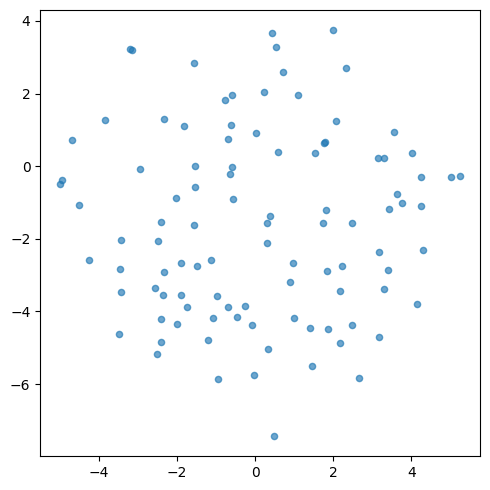

In [ ]:
plt.figure(dpi = 100, figsize = (5,5))
plt.scatter(vis_dims[:,0], vis_dims[:,1], alpha = 0.65, s = 20)
plt.tight_layout()
plt.show()

Del gráfico podemos ver que se forman algunos grupos que quizás tengan o no sentido. Vemos primero si está relacionado con el rating de las reseñas:

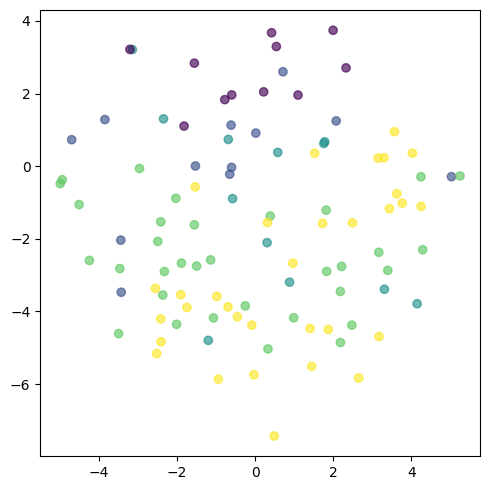

In [ ]:
plt.figure(dpi = 100, figsize = (5,5))
plt.scatter(vis_dims[:,0], vis_dims[:,1], c = df['Rating'], alpha = 0.65)
plt.tight_layout()
plt.show()

#### Clustering

Clustering es la técnica de agrupar objetos parecidos. Así como hicimos con los textos y su agrupación en tópicos, esto se puede aplicar a datos numéricos como los vectores. Transformar textos en vectores y agrupar los vectores suele ser otro camino válido para hallar ejes temáticos por ejemplo o bien para detectar otro tipo de patrones.

Una técnica muy popular de clustering se llama [K-means](https://youtu.be/4b5d3muPQmA?si=O0H3qb6nZRGl_4-S). Esta la aplicamos sobre los vectores de embeddings y después graficamos cada punto asociado con su *cluster*.

In [ ]:
# Importamos la librería KMeans de scikit-learn
from sklearn.cluster import KMeans

# Elejimos una cantidad de grupos en la cual separar nuestros datos
n_clusters = 4

# Creamos el objeto
kmeans = KMeans(n_clusters = n_clusters)

# Ajustamos sobre nuestros datos
kmeans.fit(reviews_embeddings)

# Guardamos la etiqueta del cluster en el dataframe
df['k-means_label'] = kmeans.labels_

NameError: name 'reviews_embeddings' is not defined

Graficamos con el color asociado con la etiqueta:

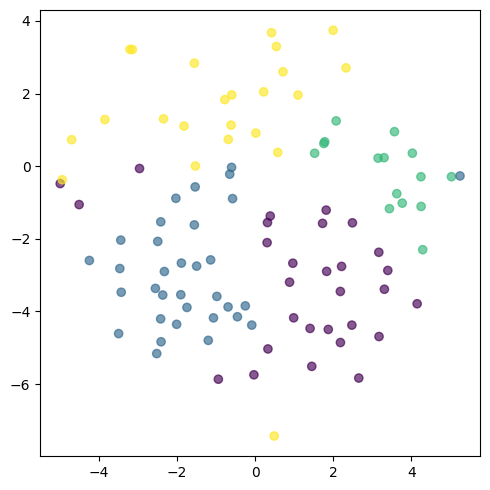

In [ ]:
plt.figure(dpi = 100, figsize = (5,5))
plt.scatter(vis_dims[:,0], vis_dims[:,1], c = df['k-means_label'], alpha = 0.65)
plt.tight_layout()
plt.show()

Podemos ver si el clustering está asociado con el rating promedio:

In [ ]:
# Agrupamos los ratings por etiqueta y promediamos
df.groupby('k-means_label').mean()

<ipython-input-40-4f3059c019db>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('k-means_label').mean()


,Rating
k-means_label,
0,4.241379
1,4.030303
2,4.200000
3,1.913043


Podemos ver la nube de palabras asociadas con cada cluster:

In [ ]:
def nube_palabras_cluster(texts):

  from nltk.corpus import stopwords

  # Agregamos aqui más palabras comunes para no mostrar en las nubes
  custom_stopwords = set([
    "room", "hotel", "rooms"
  ])

  # Combine custom stopwords with NLTK stopwords
  stop_words = set(stopwords.words("english")).union(custom_stopwords)

  # WordClouds
  wc_atributos = {'height' : 800,
                'width' : 1200,
                'background_color' : 'white',
                'max_words' : 20,
                'stopwords': stop_words
                } # Defino los parámetros que les voy a pasar a los wordclouds

  # Creo la figura
  fig, ax = plt.subplots(figsize = (6,6))

  # Creo el wordlcoud
  wc = WordCloud(**wc_atributos # De esta forma, le estoy diciendo a la función que expanda el diccionario de atributos de forma tal de que entienda lo que quiero que haga
                 ).generate_from_text(texts)

  ax.imshow(wc)
  ax.axis('off')

  plt.show()

Vemos las nubes asociadas con cada cluster:

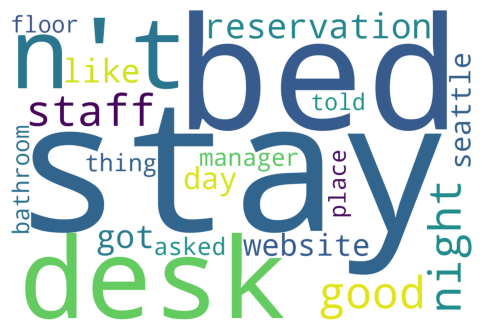

In [ ]:
cluster_label = 3

# Juntamos los textos
texts_cluster = ' '.join(df[df['k-means_label'] == cluster_label]['Review'])

# Vemos la nube de palabras asociada
nube_palabras_cluster(texts_cluster)

Veamos de vuelta algunas reseñas del cluster de la que vimos la nube de palabras:

In [ ]:
df[df['k-means_label'] == cluster_label]['Review'].head(n = 5).to_list()

['ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman b